<a href="https://colab.research.google.com/github/hakdj/teamproject2_final/blob/master/0916_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 도구모음

In [70]:
import re

In [ ]:
!pip install konlpy

In [72]:
!pip install beautifulsoup4

In [74]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
import konlpy
from konlpy.tag import Okt
okt = Okt()
import pandas as pd
import numpy as np

### 파일 가져오기

In [11]:
df=pd.read_csv('./youtubecomment_bean12.csv',encoding='cp949')

In [12]:
df2=pd.read_excel('./youtube_exercisevideo.xlsx')

### 테스트 파일

In [62]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [63]:
commentlist = '재재x탱구x키 조합 사랑해여 진짜 ㅠㅠㅠㅠㅋㅋㅋㅋㅋ 역시 분량천재 너무 웃겨 ㅠㅠㅠㅋㅋㅋㅋㅋ각잡고 춰주는 탱구 소말 춤선에 치이고 갑니다💜엔딩요정 얼굴 클로즈업할 때 새삼 왜이렇게 이뻐 또…?'

In [64]:
comment_result = []

tokens = re.sub(emoji_pattern,"", commentlist)
tokens = re.sub(han,"",tokens)
comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

In [65]:
from konlpy.tag import Twitter

In [66]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [67]:
comment_result['token']

0    [구, 키, 조합, 사랑, 진짜, 역시, 분량, 천재, 잡고, 구, 말, 춤선, 치...
Name: token, dtype: object

## 본 파일

In [5]:
from konlpy.tag import Twitter # 한글 형태소 추출
from collections import Counter # count
import nltk # natural language toolkit
from nltk.corpus import stopwords

### 이모티콘 제거

In [ ]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

### 본 파일 list에 담기

In [ ]:
lists=[]
for i in range(0,len(df)):
  lists.append(df['note'][i])
lists

In [29]:
twitter = Twitter() 
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### dataFrame으로 만들기

In [ ]:
comment_result = []
for i in range(0,len(df)):
  tokens = re.sub(emoji_pattern,"", list[i])
  tokens = re.sub(han,"",tokens)
  comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])
comment_result

### 명사 전처리

In [43]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Alpha'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
        if tag in ['Noun'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
print(noun_adj_adv_list)

['린', '전부', '와중', '골목', '막걸리', '우리', '집', '세', '할머니', '진짜', '요새', '푹', '덕질', '매일', '쌤', '유투브', '덕분', '가족', '선택', '항상', '양반', '요', '요새', '잡채', '홍어', '보고', '며칠', '전라도', 'Amazing', 'I', 'really', 'wanna', 'try', 'this', 'at', 'home', 'Delicious', 'as', 'usual', 'Thank', 'you', 'always', '분', 'Savior', 's', 'Desciple', 'absolutely', 'God', 'Bless', '역시', '줄', '오늘', '막걸리', '콩전', '요리', '탑', '항상', '콩전', '만', '린', '자문', '해주시', '쌤', '요리', '영상', '설', '추가', '유', '항상', '쌤', '멋', '유', '보통', '집', '믹서기', '대표', '점', '대표', '요리', '분', '요즘', '백종원', '영상', '해먹', '거', '진짜', '안', '콩', '쓰기', '최고', '듯', '빽쌤', '콩전', '존경', '콩전', '느낌', '시작', '한지', '얼마', '벌써', '마지막', '시점', '희망', '전진', '날', '준비', '기원', '행복', '평안', '기원', '기회', '당신', '사람', '영상', '감사', '백종원', '가족', '건강', '행복', '기원', '백종원', '보유', '국', '콩전', '정보', '감사', '명절', '꼭', '콩', '전해', '응원', '꿀팁', '콩', '반찬', '먹기', '자주', '해먹', '거', '음식', '보고', '진짜', '백종원', '콩전', '백', '쌤', '콩전', '영양', '만점', '거', '진짜', '임', '콩', '진짜', '콩', '적도', '콩', '요리', '항상', '영상', '아침', '후', '닥',

In [44]:
from wordcloud import WordCloud # 텍스트 시각화
import matplotlib.pyplot as plt # 시각화 패키지
import matplotlib 
from IPython.display import set_matplotlib_formats

#### 빈도출력

In [86]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
print(words)

{'땅콩': 161, '버터': 155, '콩': 120, '레시피': 58, '두부': 52, '맛': 45, '집': 42, '요리': 40, '해먹': 38, '요': 37, '저': 36, '콩전': 34, '백종원': 34, '거': 30, '팀': 28, '진짜': 27, '물': 26, '소금': 25, '해': 24, '오늘': 23, '영상': 23, '꼭': 22, '설탕': 22, '항상': 21, '전': 21, '두유': 20, '대신': 19, '좀': 19, '보고': 18, '믹서기': 18, '때': 18, '우리': 17, '쌤': 17, '대표': 17, '해외': 17, '재료': 17, '우유': 17, '음식': 15, '해도': 14, '외국': 14, '여름': 13, '한국': 13, 'the': 13, 'I': 12, '유': 12, '사람': 12, '감사': 12, '뭐': 12, '비지': 12, '활용': 12, '막걸리': 11, '빈대떡': 11, '콩가루': 11, '마리': 11, '분': 10, '늘': 10, '왜': 10, '한번': 10, '홍철': 10, '덕분': 9, '날': 9, '김치': 9, '메뉴': 9, '라면': 9, '국물': 9, '텔': 9, '가족': 8, '요즘': 8, '건강': 8, '자주': 8, '고기': 8, '홍진호': 8, '번': 8, '콩물': 8, '법': 8, '깨': 8, '면': 8, '본인': 8, '안': 7, '최고': 7, '기원': 7, '가루': 7, 'and': 7, '처치': 7, '병아리': 7, '댓글': 7, '구': 7, '파': 7, '돈': 7, '빠다': 7, '추가': 6, '정보': 6, '곤란': 6, '다가': 6, '원래': 6, '혹시': 6, '컵': 6, '믹서': 6, '소스': 6, 'it': 6, '계란': 6, '가요': 6, 'for': 6, '방법': 6, '글': 6, '국민': 6, 'thi

#### 시각화

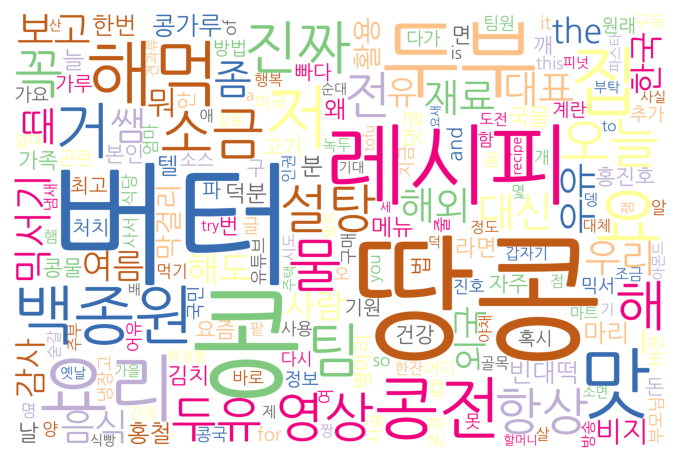

In [52]:
#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/Nanum.TTF', background_color='white',colormap = "Accent_r", width=4500, height=3000).generate_from_frequencies(words) 
plt.
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

#### 그래프

In [60]:
from collections import Counter
import matplotlib.pylab as plt2
import numpy as np

In [87]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
type(comment_result)


/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


pandas.core.frame.DataFrame

In [89]:
comment_result.to_csv("./테스트용.csv",index=False, encoding='CP949')

In [82]:
comment_result

,comment,token
0,이분은 요린이들이 얼마나 소심한지를 전부 꿰뚫은 것 같아서 좋다,"[이분, 린, 얼마나, 전부, 것]"
1,그와중에 골목막걸리까지 챙겨주시는 백선생님 대단하십니다,"[와중, 골목, 막걸리, 선생님]"
2,백선생님 우리집 80세 할머니가 진짜 요새 푹 빠지셔서 선생님 덕질을 하세요 매일...,"[선생님, 우리, 집, 세, 할머니, 진짜, 요새, 푹, 선생님, 덕질, 매일, 쌤..."
3,Amazing I really wanna try this at home Delic...,[]
4,이런 분이 Savior's Desciple absolutely God Bless ♡♡♡,[분]
...,...,...
652,아무나선언기분좋은국민1대선출마선언문 : 중서민용 요충지쾌적분양공공주택공급 중요한건벽...,"[나선, 기분, 국민, 대선, 출마, 선언문, 중, 서민, 용, 요충지, 쾌적, 분..."
653,Promoting too much carb makes Korean people a ...,[]
654,항상 텔레비전 방송 자막보면 계란을 달걀로야채를 채소로 바꿔서 적던데 백종원씨처럼 ...,"[항상, 텔레비전, 방송, 자막, 계란, 달걀, 야채, 채소, 백종원, 영향력, 분..."
655,방송에서 팔장좀 끼지마라 역겹다 거만해보여,"[방송, 장좀, 거만]"


In [ ]:
noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(15)

#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

index = np.arange(len(test))
plt2.bar(index,test['count'].tolist() )
plt2.xlabel('word', fontsize=5)
plt2.ylabel('count', fontsize=5)
plt2.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt2.title('단어 빈도수 시각화')
plt2.show()

### 말뭉치 추가

In [92]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [96]:
kkma = Kkma()

In [99]:
pprint(kkma.sentences(comment_result['comment'][1]))

['그 와중에 골목 막걸리까지 챙겨 주시는 백 선생님 대단하십니다']


In [100]:
pprint(kkma.words(comment_result['comment'][1]))

AttributeError: ignored

* 단어 추가할 것 넣기: 선택해서
 * ex) 빽샘, 쉽다
 * 등등 선택해서 20개정도만 해보기